In [ ]:
#script untuk mengganti titik koma menjadi koma pada csv
import csv

input_file = '/content/drive/MyDrive/skripsi/dataset/new_label.csv'
output_file = 'new.csv'

with open(input_file, 'r', newline='', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile, delimiter=';')
    writer = csv.writer(outfile, delimiter=',')

    for row in reader:
        writer.writerow(row)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/skripsi/dataset/fix/label.csv')
data

,tweet_tokens_stemmed,sentiment
0,"['win', 'rrq', 'skylar', 'sempet', 'salah', 'e...",positive
1,"['nyenggol', 'rrq', 'makan', 'cowo', 'pick']",negative
2,"['salah', 'bawa', 'bawa', 'rrq', 'udah', 'fans...",negative
3,"['inisiasi', 'naomi', 'daya', 'tarik', 'rrq', ...",positive
4,"['fans', 'rrq', 'panas', 'nasib', 'mantan', 'c...",negative
...,...,...
1369,"['rrq', 'rungkad', 'awowkwkw']",negative
1370,"['tanda', 'rrq', 'lolos', 'playoff']",negative
1371,"['emg', 'fakta', 'rrq']",negative
1372,"['ril', 'nyenggolnya', 'rrq', 'tim', 'gede']",negative


# **TF-IDF**

## TOP 5 bobot tertinggi

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/skripsi/dataset/fix/label.csv'  # Ganti dengan path file CSV Anda
data = pd.read_csv(file_path)

# Menangani nilai NaN dengan menghapus baris yang mengandung NaN
data = data.dropna(subset=['tweet_tokens_stemmed', 'sentiment'])

# Pastikan kolom 'tweet' dan 'sentiment' ada dalam dataset
if 'tweet_tokens_stemmed' not in data.columns or 'sentiment' not in data.columns:
    raise ValueError("Kolom 'tweet' atau 'sentiment' tidak ditemukan dalam dataset.")

# Menggunakan TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['tweet_tokens_stemmed'])

# Mengonversi hasil TF-IDF ke dalam DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menambahkan kolom 'sentiment' ke DataFrame hasil TF-IDF
tfidf_df['sentiment'] = data['sentiment'].values

# Mencari total bobot untuk setiap kata
word_weights = tfidf_df.drop('sentiment', axis=1).sum()

# Mengurutkan kata berdasarkan bobotnya secara descending
sorted_words = word_weights.sort_values(ascending=False)

# Mencetak lima kata dengan bobot tertinggi
print("Top 5 Kata dengan Bobot Tertinggi:")
print(sorted_words.head())


Top 5 Kata dengan Bobot Tertinggi:
rrq       137.377921
menang     54.735544
onic       46.462968
kalah      44.676129
gg         34.431349
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# ...

# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/skripsi/dataset/fix/label.csv'  # Ganti dengan path file CSV Anda
data = pd.read_csv(file_path)



'''
# delete nilai NaN
data = data.dropna(subset=['tweet_tokens_stemmed', 'sentiment'])

# Menampilkan jumlah total baris setelah delete nilai NaN
total_baris = len(data)
print(f"Total baris setelah penghapusan nilai NaN: {total_baris}")
'''


# Pastikan kolom 'text' dan 'label' ada dalam dataset
if 'tweet_tokens_stemmed' not in data.columns or 'sentiment' not in data.columns:
    raise ValueError("Kolom 'text' atau 'label' tidak ditemukan dalam dataset.")

# Menggunakan TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['tweet_tokens_stemmed'])
y = data['sentiment']

# Menampilkan hasil TF-IDF untuk beberapa dokumen
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF untuk beberapa dokumen:")
print(df_tfidf.head())

TF-IDF untuk beberapa dokumen:
   aaaaa  aaaaaaaaaaaa  aamiin  aaq  abang  abis  abisss  absen  achievement  \
0    0.0           0.0     0.0  0.0    0.0   0.0     0.0    0.0          0.0   
1    0.0           0.0     0.0  0.0    0.0   0.0     0.0    0.0          0.0   
2    0.0           0.0     0.0  0.0    0.0   0.0     0.0    0.0          0.0   
3    0.0           0.0     0.0  0.0    0.0   0.0     0.0    0.0          0.0   
4    0.0           0.0     0.0  0.0    0.0   0.0     0.0    0.0          0.0   

   acil  ...  yuzhong   yz  zaman  zaya   zb  zhong  zona  zoning  zyg  \
0   0.0  ...      0.0  0.0    0.0   0.0  0.0    0.0   0.0     0.0  0.0   
1   0.0  ...      0.0  0.0    0.0   0.0  0.0    0.0   0.0     0.0  0.0   
2   0.0  ...      0.0  0.0    0.0   0.0  0.0    0.0   0.0     0.0  0.0   
3   0.0  ...      0.0  0.0    0.0   0.0  0.0    0.0   0.0     0.0  0.0   
4   0.0  ...      0.0  0.0    0.0   0.0  0.0    0.0   0.0     0.0  0.0   

   zygkuuuu  
0       0.0  
1       0.0  
2

## Output Hasil TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/skripsi/dataset/fix/label.csv'  # Ganti dengan path file CSV Anda
data = pd.read_csv(file_path)

# Menangani nilai NaN dengan menghapus baris yang mengandung NaN
data = data.dropna(subset=['tweet_tokens_stemmed', 'sentiment'])

# Pastikan kolom 'tweet' dan 'sentiment' ada dalam dataset
if 'tweet_tokens_stemmed' not in data.columns or 'sentiment' not in data.columns:
    raise ValueError("Kolom 'tweet' atau 'sentiment' tidak ditemukan dalam dataset.")

# Menggunakan TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['tweet_tokens_stemmed'])

# Mengonversi hasil TF-IDF ke dalam DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menambahkan kolom 'sentiment' ke DataFrame hasil TF-IDF
tfidf_df['sentiment'] = data['sentiment'].values

# Menyimpan hasil TF-IDF ke dalam file CSV
output_csv_path = 'tfidf_result.csv'  # Ganti dengan path tempat Anda ingin menyimpan file CSV
tfidf_df.to_csv(output_csv_path, index=False)


# **New Version SKFCV**

## NB New Version

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Membaca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/skripsi/dataset/fix/label.csv')

# Menginisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['tweet_tokens_stemmed'])
y = data['sentiment']

# Menginisialisasi objek KFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Membagi data menjadi train dan test sets menggunakan Stratified K-Fold CV
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inisialisasi dan pelatihan model Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Melakukan prediksi pada data pengujian
    y_pred = model.predict(X_test)

    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Menampilkan confusion matrix dan akurasi
    print(f"\nFold {fold + 1} - Confusion Matrix:")
    print(cm)

    # Menampilkan TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

    # Menghitung dan menampilkan akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2%}")



Fold 1 - Confusion Matrix:
[[39 20]
 [ 7 72]]
True Positives (TP): 72
True Negatives (TN): 39
False Positives (FP): 20
False Negatives (FN): 7
Accuracy: 80.43%

Fold 2 - Confusion Matrix:
[[36 23]
 [ 8 71]]
True Positives (TP): 71
True Negatives (TN): 36
False Positives (FP): 23
False Negatives (FN): 8
Accuracy: 77.54%

Fold 3 - Confusion Matrix:
[[26 33]
 [ 8 71]]
True Positives (TP): 71
True Negatives (TN): 26
False Positives (FP): 33
False Negatives (FN): 8
Accuracy: 70.29%

Fold 4 - Confusion Matrix:
[[33 26]
 [ 5 74]]
True Positives (TP): 74
True Negatives (TN): 33
False Positives (FP): 26
False Negatives (FN): 5
Accuracy: 77.54%

Fold 5 - Confusion Matrix:
[[36 22]
 [ 6 73]]
True Positives (TP): 73
True Negatives (TN): 36
False Positives (FP): 22
False Negatives (FN): 6
Accuracy: 79.56%

Fold 6 - Confusion Matrix:
[[38 20]
 [13 66]]
True Positives (TP): 66
True Negatives (TN): 38
False Positives (FP): 20
False Negatives (FN): 13
Accuracy: 75.91%

Fold 7 - Confusion Matrix:
[[38 

## SVM New Version

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Membaca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/skripsi/dataset/fix/label.csv')

# Menginisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['tweet_tokens_stemmed'])
y = data['sentiment']

# Menginisialisasi objek KFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Membagi data menjadi train dan test sets menggunakan Stratified K-Fold CV
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inisialisasi dan pelatihan model SVM
    model = SVC(kernel='linear', C=1.0)
    model.fit(X_train, y_train)

    # Melakukan prediksi pada data pengujian
    y_pred = model.predict(X_test)

    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Menampilkan confusion matrix dan akurasi
    print(f"\nFold {fold + 1} - Confusion Matrix:")
    print(cm)

    # Menampilkan TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

    # Menghitung dan menampilkan akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2%}")



Fold 1 - Confusion Matrix:
[[47 12]
 [11 68]]
True Positives (TP): 68
True Negatives (TN): 47
False Positives (FP): 12
False Negatives (FN): 11
Accuracy: 83.33%

Fold 2 - Confusion Matrix:
[[39 20]
 [ 9 70]]
True Positives (TP): 70
True Negatives (TN): 39
False Positives (FP): 20
False Negatives (FN): 9
Accuracy: 78.99%

Fold 3 - Confusion Matrix:
[[31 28]
 [11 68]]
True Positives (TP): 68
True Negatives (TN): 31
False Positives (FP): 28
False Negatives (FN): 11
Accuracy: 71.74%

Fold 4 - Confusion Matrix:
[[39 20]
 [ 8 71]]
True Positives (TP): 71
True Negatives (TN): 39
False Positives (FP): 20
False Negatives (FN): 8
Accuracy: 79.71%

Fold 5 - Confusion Matrix:
[[43 15]
 [16 63]]
True Positives (TP): 63
True Negatives (TN): 43
False Positives (FP): 15
False Negatives (FN): 16
Accuracy: 77.37%

Fold 6 - Confusion Matrix:
[[43 15]
 [14 65]]
True Positives (TP): 65
True Negatives (TN): 43
False Positives (FP): 15
False Negatives (FN): 14
Accuracy: 78.83%

Fold 7 - Confusion Matrix:
[[

## KNN New Version

### Mencari nilai K terbaik

Hasil Akurasi untuk Setiap Nilai k:
k = 1: 69.07%
k = 2: 71.91%
k = 3: 73.21%
k = 4: 74.16%
k = 5: 74.74%
k = 6: 75.47%
k = 7: 74.45%
k = 8: 75.25%
k = 9: 75.25%
k = 10: 76.64%
k = 11: 76.13%
k = 12: 76.34%
k = 13: 76.56%
k = 14: 77.36%
k = 15: 77.14%
k = 16: 77.22%
k = 17: 76.56%
k = 18: 77.51%
k = 19: 76.63%
k = 20: 77.87%
k = 21: 77.00%
k = 22: 77.80%
k = 23: 77.22%
k = 24: 77.44%
k = 25: 77.22%
k = 26: 77.22%
k = 27: 76.49%
k = 28: 76.78%
k = 29: 76.49%
k = 30: 76.85%

Nilai k terbaik: 20


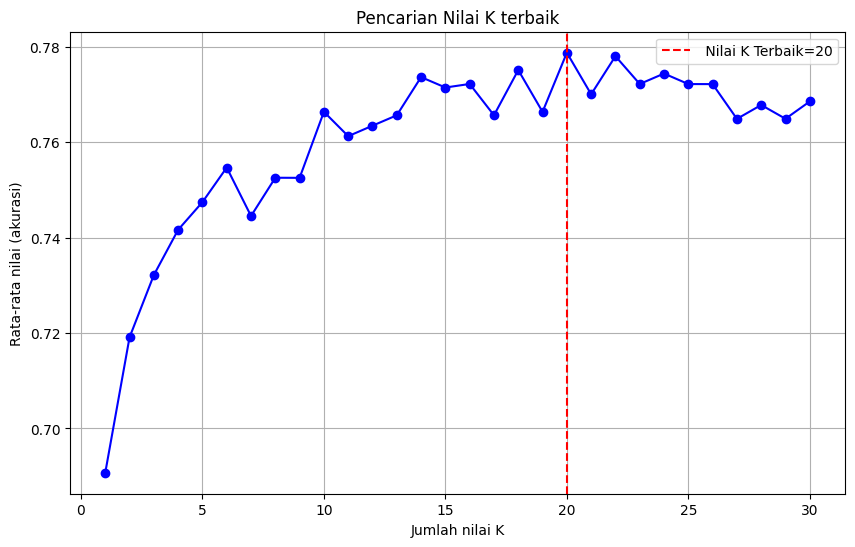

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/skripsi/dataset/fix/label.csv'  # Ganti dengan path file CSV Anda
data = pd.read_csv(file_path)

# Menangani nilai NaN dengan menghapus baris yang mengandung NaN
data = data.dropna(subset=['tweet_tokens_stemmed', 'sentiment'])

# Pastikan kolom 'tweet' dan 'sentiment' ada dalam dataset
if 'tweet_tokens_stemmed' not in data.columns or 'sentiment' not in data.columns:
    raise ValueError("Kolom 'tweet' atau 'sentiment' tidak ditemukan dalam dataset.")

# Menggunakan TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['tweet_tokens_stemmed'])
y = data['sentiment']

# K-Fold Cross Validation untuk pemilihan parameter terbaik
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Range nilai k yang akan dicoba
param_grid = {'n_neighbors': range(1, 31)}

# KNN model
knn_model = KNeighborsClassifier()

# GridSearchCV untuk mencari nilai k terbaik
grid_search = GridSearchCV(knn_model, param_grid, scoring='accuracy', cv=kfold)
grid_search.fit(X_tfidf, y)

# Mendapatkan hasil grid search
results = pd.DataFrame(grid_search.cv_results_)

# Menampilkan hasil akurasi untuk setiap nilai k
print("Hasil Akurasi untuk Setiap Nilai k:")
for i, row in results.iterrows():
    print(f"k = {row['param_n_neighbors']}: {row['mean_test_score']:.2%}")

# Mendapatkan nilai k terbaik dari hasil grid search
best_k = grid_search.best_params_['n_neighbors']

print(f"\nNilai k terbaik: {best_k}")

# ... (lanjutan dari kode sebelumnya)

# Menyimpan hasil grid search untuk plotting
results = pd.DataFrame(grid_search.cv_results_)

# Plotting hasil cross-validation untuk nilai k
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o', linestyle='-', color='b')
plt.title('Pencarian Nilai K terbaik')
plt.xlabel('Jumlah nilai K')
plt.ylabel('Rata-rata nilai (akurasi)')
plt.axvline(x=best_k, color='r', linestyle='--', label=f' Nilai K Terbaik={best_k}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Membaca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/skripsi/dataset/fix/label.csv')

# Menginisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['tweet_tokens_stemmed'])
y = data['sentiment']

# Menginisialisasi objek KFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Membagi data menjadi train dan test sets menggunakan Stratified K-Fold CV
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inisialisasi dan pelatihan model KNN dengan k=20
    model = KNeighborsClassifier(n_neighbors=20)
    model.fit(X_train, y_train)

    # Melakukan prediksi pada data pengujian
    y_pred = model.predict(X_test)

    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Menampilkan confusion matrix dan akurasi
    print(f"\nFold {fold + 1} - Confusion Matrix:")
    print(cm)

    # Menampilkan TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

    # Menghitung dan menampilkan akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2%}")



Fold 1 - Confusion Matrix:
[[41 18]
 [ 6 73]]
True Positives (TP): 73
True Negatives (TN): 41
False Positives (FP): 18
False Negatives (FN): 6
Accuracy: 82.61%

Fold 2 - Confusion Matrix:
[[35 24]
 [ 7 72]]
True Positives (TP): 72
True Negatives (TN): 35
False Positives (FP): 24
False Negatives (FN): 7
Accuracy: 77.54%

Fold 3 - Confusion Matrix:
[[36 23]
 [ 9 70]]
True Positives (TP): 70
True Negatives (TN): 36
False Positives (FP): 23
False Negatives (FN): 9
Accuracy: 76.81%

Fold 4 - Confusion Matrix:
[[37 22]
 [12 67]]
True Positives (TP): 67
True Negatives (TN): 37
False Positives (FP): 22
False Negatives (FN): 12
Accuracy: 75.36%

Fold 5 - Confusion Matrix:
[[38 20]
 [11 68]]
True Positives (TP): 68
True Negatives (TN): 38
False Positives (FP): 20
False Negatives (FN): 11
Accuracy: 77.37%

Fold 6 - Confusion Matrix:
[[38 20]
 [13 66]]
True Positives (TP): 66
True Negatives (TN): 38
False Positives (FP): 20
False Negatives (FN): 13
Accuracy: 75.91%

Fold 7 - Confusion Matrix:
[[4